# Project Puzzle Analysis

In [1]:
# Install dependencies
import pandas as pd
import os
import glob
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load all data - modify for your needs
def load_csv_files(directory_path):
    csv_files = glob.glob(os.path.join(directory_path, "*.csv"))
    dataframe_map = {}
    for file in csv_files:
        df = pd.read_csv(file, low_memory=False, index_col=False)
        filename = os.path.splitext(os.path.basename(file))[0]
        dataframe_map[filename] = df
    return dataframe_map

costrac = pd.read_csv("data\project-puzzle-dataset_new\Costrac\Pivot_Budgets_Forecasts_Commits_Actuals.csv", low_memory=False, index_col=False)
documents = pd.read_csv("data\project-puzzle-dataset_new\Documents\manifest.csv", index_col=False)
grc = load_csv_files("data\project-puzzle-dataset_new\GRC")
primavera = load_csv_files("data\project-puzzle-dataset_new\Primavera")

# Data analysis

- Documents - Spreadsheets related to the project

- GRC - Risk Data

- Primavera - Schedule Data

- Costrac - Cost data

In [4]:
costrac.head()

,Unnamed: 0,Project,ProjectNo,Company,CostTypeCode,CostType,WBS1Code,WBS1,WBS2Code,WBS2,...,OriginalPRValue,VOValue,POApprovedDate,PCApprovedDate,TransactionType,PRItem,PRDescription,TransactionDate,BCWP,BudgetID
0,0,Belfast Implementation Project (BIP),ECC-000004,EXXARO COAL MPUMALANGA (PTY) LTD,DIR,Direct Cost,T,Resettlements,RS,Resettlements,...,0.0,0.0,1900-01-01,1900-01-01,BWU,NaN,NaN,2014-08-11 15:44:49,0.0,99573
1,1,Belfast Implementation Project (BIP),ECC-000004,EXXARO COAL MPUMALANGA (PTY) LTD,DIR,Direct Cost,T,Resettlements,RS,Resettlements,...,0.0,0.0,1900-01-01,1900-01-01,BWU,NaN,NaN,2014-08-11 15:44:49,0.0,99573
2,2,Belfast Implementation Project (BIP),ECC-000004,EXXARO COAL MPUMALANGA (PTY) LTD,DIR,Direct Cost,T,Resettlements,RS,Resettlements,...,0.0,0.0,1900-01-01,1900-01-01,BWU,NaN,NaN,2014-08-11 15:44:49,0.0,99573
3,3,Belfast Implementation Project (BIP),ECC-000004,EXXARO COAL MPUMALANGA (PTY) LTD,DIR,Direct Cost,T,Resettlements,RS,Resettlements,...,0.0,0.0,1900-01-01,1900-01-01,BWU,NaN,NaN,2014-08-11 15:44:49,0.0,99573
4,4,Belfast Implementation Project (BIP),ECC-000004,EXXARO COAL MPUMALANGA (PTY) LTD,DIR,Direct Cost,T,Resettlements,RS,Resettlements,...,0.0,0.0,1900-01-01,1900-01-01,BWU,NaN,NaN,2014-08-11 15:44:49,0.0,99573


In [5]:
costrac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65513 entries, 0 to 65512
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     65513 non-null  int64  
 1   Project                        65513 non-null  object 
 2   ProjectNo                      65513 non-null  object 
 3   Company                        65513 non-null  object 
 4   CostTypeCode                   65513 non-null  object 
 5   CostType                       65513 non-null  object 
 6   WBS1Code                       65513 non-null  object 
 7   WBS1                           65513 non-null  object 
 8   WBS2Code                       65513 non-null  object 
 9   WBS2                           65513 non-null  object 
 10  WBS3Code                       65513 non-null  object 
 11  WBS3                           65513 non-null  object 
 12  CurrencyCode                   65513 non-null 

In [6]:
documents.head()

,File Name,Title,Discipline,Type,Document Sub Type
0,201810 - Systems Alignment Report - FINAL.xlsx,201809 - SAP Costrac Alignment Report - End Se...,Project Control,Project Control,Report
1,Baseline BIP - Traffic HIRA - rev 1.xlsx,Baseline TMM Risk Assessment,Health & Safety,Health and Safety,Risk Assessment
2,Belfast Implementation Project - Monthly Summa...,Belfast Implementation Project - Monthly Summa...,Project Management,Communication,Report
3,Belfast Project - Current WBS Working File 201...,Work Breakdown Structure,Project Management,Project Control,Work Breakdown Structure
4,BIP - BASELINE RISK ASSESSMENT - DATE 05 12 20...,Baseline Risk Assessment - Hazard Identificati...,Health & Safety,Health and Safety,Risk Assessment


In [7]:
risk_trend = grc['dboZBI_RISK_EXTRACT_TREND_DS']
risk_trend.head()

,Unnamed: 0,ZZEX_TREND_PERIOD1,ZZEX_TREND_PERIOD2,ZZEX_TREND_ENTITY,ZZEX_TREND_ID,ZZEX_TREND_RISK_ID,ZZEX_TREND_RISK_T_P1,ZZEX_TREND_RISK_T_P2,ZZEX_TREND_RISK_STATUS_P1,ZZEX_TREND_RISK_STATUS_P2,...,ZZEX_TREND_ANA_RSP_RSL_T_P2,ZZEX_TREND_ANA_RSP_RSS_T_P1,ZZEX_TREND_ANA_RSP_RSS_T_P2,ZZEX_TREND_RISK_RISK_LEVEL_P1,ZZEX_TREND_RISK_RISK_LEVEL_P2,ZZEX_TREND_RISK_RISK_LEVEL_TP1,ZZEX_TREND_RISK_RISK_LEVEL_TP2,ODQ_CHANGEMODE,ODQ_ENTITYCNTR,LOAD_DATE
0,0,1/01/2021,1/07/2021,RS,NaN,50000723,Flooding,Flooding,Active,Active,...,Very High,46.1622,46.1622,VH,VH,Very High,Very High,NaN,0,59:03.4
1,1,1/01/2021,1/07/2021,RS,NaN,50000734,Inadequate TFR performance,Inadequate TFR performance,Active,Active,...,Very High,72.6300,77.5675,VH,VH,Very High,Very High,NaN,0,59:03.4
2,2,1/01/2021,1/07/2021,RS,NaN,50000755,Unavailability of electricity,Unavailability of electricity,Active,Active,...,High,9.1000,9.1000,H,H,High,High,NaN,0,59:03.4
3,3,1/01/2021,1/07/2021,RS,NaN,50002039,Theft of property,Theft of property,Active,Active,...,Very High,32.9700,59.5650,H,VH,High,Very High,NaN,0,59:03.4
4,4,1/01/2021,1/07/2021,RS,NaN,50002040,Community unrest,Community unrest,Active,Active,...,Very High,60.7500,69.7500,VH,VH,Very High,Very High,NaN,0,59:03.4


In [8]:
bre_registry = primavera['dboBRE_REGISTRY']
bre_registry.head()

,Unnamed: 0,start_time,last_time,status_code,torched_time,config_name,config_changed_flag,update_date,update_user,create_date,create_user,delete_session_id,delete_date
0,0,2020-10-20 16:47:43.523,2020-10-20 16:47:43.523,A,NaN,Primavera P6 Configuration,NaN,2020-10-20 16:47:43.523,98c8439b013a0986,2020-10-20 16:47:43.523,98c8439b013a0986,NaN,NaN
1,1,2022-05-22 23:00:06.370,2022-05-23 00:58:37.833,A,NaN,Primavera P6 Configuration New,NaN,2022-05-23 00:58:37.833,c0e03f8674ac0a5f,2022-05-22 23:00:06.427,c0e03f8674ac0a5f,NaN,NaN
2,2,2021-09-09 07:06:18.907,2021-09-09 08:09:19.937,A,NaN,Primavera P6 Configuration,NaN,2021-09-09 08:09:19.970,98c8439b013a0986,2021-09-09 07:06:18.923,98c8439b013a0986,NaN,NaN
3,3,2022-10-02 23:00:04.957,2022-10-03 00:58:37.570,A,NaN,Primavera P6 Configuration New,NaN,2022-10-03 00:58:37.570,7330fb850683f285,2022-10-02 23:00:05.277,7330fb850683f285,NaN,NaN
4,4,2018-11-22 01:15:49.873,2018-11-22 22:27:00.660,A,NaN,Primavera P6 Configuration,Y,2019-08-17 12:01:58.557,7330fb850683f285,2018-11-22 01:15:49.877,98c8439b013a0986,NaN,NaN


In [9]:
prima_cal = primavera['dboCALENDAR']
prima_cal.head()

,Unnamed: 0,clndr_id,default_flag,rsrc_private,clndr_name,proj_id,base_clndr_id,last_chng_date,clndr_type,day_hr_cnt,week_hr_cnt,year_hr_cnt,month_hr_cnt,update_date,update_user,create_date,create_user,delete_session_id,delete_date
0,0,178,N,N,Corporate - Standard Full Time,NaN,NaN,2000-05-23 16:14:00,CA_Base,8.0,40.0,2000.0,172.0,2022-12-13 11:14:05.713,c0e03f8674ac0a5f,NaN,NaN,NaN,NaN
1,1,5829,N,N,Trades - 5 Day Workweek,NaN,NaN,2000-04-26 14:11:00,CA_Base,8.0,40.0,2000.0,172.0,2022-12-13 11:14:05.713,c0e03f8674ac0a5f,2010-01-25 13:36:32.000,a04d1fd73d115cae,NaN,NaN
2,2,6205,N,N,7x24,NaN,NaN,2009-04-27 00:00:00,CA_Base,22.0,154.0,8030.0,660.0,2022-12-13 11:14:05.713,c0e03f8674ac0a5f,2010-02-07 15:41:01.000,a04d1fd73d115cae,NaN,NaN
3,3,6207,N,N,5x10,NaN,NaN,2019-04-11 00:00:00,CA_Base,10.0,50.0,3650.0,300.0,2022-12-13 11:14:05.713,c0e03f8674ac0a5f,2010-02-07 15:41:01.000,a04d1fd73d115cae,NaN,NaN
4,4,6208,N,N,6x24,NaN,NaN,2009-04-27 00:00:00,CA_Base,22.0,132.0,6880.0,572.0,2022-12-13 11:14:05.713,c0e03f8674ac0a5f,2010-02-07 15:41:02.000,a04d1fd73d115cae,NaN,NaN


# 1. What factors influence cost overruns?

In [10]:
# list of cols in cost/budget dataset
costrac.columns

Index(['Unnamed: 0', 'Project', 'ProjectNo', 'Company', 'CostTypeCode',
       'CostType', 'WBS1Code', 'WBS1', 'WBS2Code', 'WBS2', 'WBS3Code', 'WBS3',
       'CurrencyCode', 'Currency', 'DisciplineCode', 'DisciplineDesc',
       'AspectCode', 'AspectDesc', 'PackageCode', 'PackageDesc', 'ElementCode',
       'ElementDesc', 'UserDefCode', 'UserDefDesc', 'WorkSummary', 'Item',
       'DateTo', 'PeriodNumber', 'year', 'month', 'FiscalYear', 'Released',
       'FFC', 'FCC', 'CommitmentSpread', 'CommitmentPeriod', 'Actuals',
       'ActualsinPreparation', 'CommitmentinPreparationSpread',
       'CommitmentinPreparationPeriod', 'OriginalBudget', 'PendingChanges',
       'ApprovedChanges', 'Uncommitted', 'Contractor', 'PRNumber', 'PCNumber',
       'ForecastActualID', 'CommitsActualID', 'ProjectID', 'CostClass',
       'GroupingCode1', 'GroupingCode2', 'VendorInvoiceNumber',
       'VendorInvoiceDate', 'PRReference', 'VONumber', 'OriginalPRValue',
       'VOValue', 'POApprovedDate', 'PCApprove

### Analyse wrt to items' cost factors

In [11]:
# check the cost type
costrac['CostType'].unique()

array(['Direct Cost', 'Indirect Cost', 'Risk', 'Pre Production Costs'],
      dtype=object)

In [12]:
# which currency is used?
costrac['Currency'].unique()

array(['South African Rand'], dtype=object)

In [13]:
# total items cost are included
costrac['Item'].unique()

array(['Direct Cost for Resettlements - People and Graves (Services) Package 307',
       'Direct Cost for Sidings  - Rietkuil Siding (Services) Package 551',
       'Consulting Cost for Wetland Rehabilitation Engineering - Package 104',
       'Consulting Cost for IM Detail Designs - Package 601',
       'Direct Cost for Wetland Offsets - Wetland Off-sets (Services) Package 308',
       'Direct Cost for Box Cuts - Mining Box Cuts (Construct) Package 602',
       'Direct Cost for Mobile Equipment - Mobile Equipment Primary (Supply) Package 501',
       'Direct Cost for Mobile Equipment - Mobile Equipment Secondary (Supply) Package 502',
       'Direct Cost for Mobile Equipment - Mobile Equipment Support (Supply) Package 503',
       'Direct Cost for Early Works - Early Works (Construct) Package 301',
       'Direct Cost for Early Works - Early Works (Supply) Package 301',
       'Direct Cost for Early Works - Early Works (Services) Package 301',
       'Direct Cost for Early Works - Ea

In [14]:
# how many unique items are there in cost list?
costrac['Item'].nunique()

890

In [15]:
# analyze package code and discipline and element code
costrac['PackageCode'].nunique()

84

In [16]:
costrac['PackageCode'].unique()

array(['307', '551', '104', '601', '308', '602', '501', '502', '503',
       '301', '302', '303', '306', '304', '203', '603', '204', '205',
       '606', '309', '305a', '202', '604', '709', '605', '201', '101',
       '102', '103', '106', '105', '702', '701', '705', '607', '704',
       '703', '403', '706', '401', '402', '901', '902', '107', '903',
       '206', '608', '707', '710', '310', '711', '311', '312', '713',
       '712', '609', '108', '714', '610', '313', '314', '109', '715',
       '315', '316', '317', '318', '404', '405', '717', '611', '612',
       '718', '719', '613', '615', '616', '202a', '202b', '305b', '305c',
       '305d', '305e', '319'], dtype=object)

In [17]:
costrac['DisciplineCode'].nunique()

12

In [18]:
costrac['DisciplineCode'].unique()

array(['OTH', 'ENG', 'MEC', 'CIV', 'ELE', 'PIP', 'C&I', 'RAI', 'STR',
       'ALL', 'HOC', 'PLW'], dtype=object)

In [19]:
costrac['ElementCode'].nunique()

52

In [20]:
costrac['ElementCode'].unique()

array(['PG', 'RS', 'CST', 'WO', 'MB', 'MEP', 'MES', 'MESU', 'EW', 'MPAB',
       'MPAC', 'DF', 'MAPE', 'GC', 'EU', 'DLD', 'EPM', 'MPWT', 'PF',
       'CHP', 'OWN', 'TI', 'AE', 'RSS', 'GE', 'DAY', 'EWS', 'IM', 'BLD',
       'STR', 'DSC', 'RES', 'FEN', 'GAS', 'CLN', 'T&E', 'HOC', 'CCS',
       'PSC', 'CHPPG', 'PMEC', 'PSTW', 'PPLW', 'PCIV', 'CSTW', 'CMEC',
       'CPLW', 'PIND', 'PPIP', 'PCON', 'PELE', 'PECI'], dtype=object)

- I find five features that are most important to understand cost of the projects and factors that can help to analyze costoverruns
- Five features are:- 'CostType', 'ElementCode','DisciplineCode','PackageCode', 'Item'

In [21]:
# creat sub-df of items/products based features to check what causes the cost overruns
prod_df = costrac[['CostType', 'ElementCode','DisciplineCode','PackageCode', 'Item','Actuals','Actuals','ActualsinPreparation','OriginalBudget','PendingChanges','ApprovedChanges']]

In [22]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65513 entries, 0 to 65512
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CostType              65513 non-null  object 
 1   ElementCode           65513 non-null  object 
 2   DisciplineCode        65513 non-null  object 
 3   PackageCode           65513 non-null  object 
 4   Item                  65513 non-null  object 
 5   Actuals               65513 non-null  float64
 6   Actuals               65513 non-null  float64
 7   ActualsinPreparation  65513 non-null  float64
 8   OriginalBudget        65513 non-null  float64
 9   PendingChanges        65513 non-null  float64
 10  ApprovedChanges       65513 non-null  float64
dtypes: float64(6), object(5)
memory usage: 5.5+ MB


In [23]:
cost_overrun = prod_df[(prod_df['PendingChanges'] > 0.0) | (prod_df['ApprovedChanges'] > 0.0)]

In [24]:
# What percentage of items are running over a cost as per the estimation
len(cost_overrun)/len(prod_df)*100

25.69413704150321

1. By costtype

In [25]:
cost_overrun.groupby('CostType')['PendingChanges','ApprovedChanges'].mean()

C:\Users\Avi\AppData\Local\Temp\ipykernel_21508\933485322.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cost_overrun.groupby('CostType')['PendingChanges','ApprovedChanges'].mean()


,PendingChanges,ApprovedChanges
CostType,,
Direct Cost,9.158707e-07,5.550310e+05
Indirect Cost,5.486369e+00,1.732790e+05
Pre Production Costs,0.000000e+00,1.465000e+08
Risk,3.240267e+03,6.800149e+05


2. By ElementCode

In [26]:
cost_overrun.groupby('ElementCode')['PendingChanges','ApprovedChanges'].mean()

C:\Users\Avi\AppData\Local\Temp\ipykernel_21508\1936978889.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cost_overrun.groupby('ElementCode')['PendingChanges','ApprovedChanges'].mean()


,PendingChanges,ApprovedChanges
ElementCode,,
AE,2914.829837,7.010182e+05
BLD,0.000000,1.883781e+05
CCS,13.325289,1.199646e+05
CHP,0.000000,1.318739e+06
CHPPG,0.000000,4.205889e+05
CLN,0.000000,2.126013e+05
CMEC,0.000000,7.483081e+05
CPLW,0.000000,1.126199e+05
CST,0.000000,1.389156e+05


3. By DisciplineCode

In [27]:
cost_overrun.groupby('DisciplineCode')['PendingChanges','ApprovedChanges'].mean()

C:\Users\Avi\AppData\Local\Temp\ipykernel_21508\658978018.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cost_overrun.groupby('DisciplineCode')['PendingChanges','ApprovedChanges'].mean()


,PendingChanges,ApprovedChanges
DisciplineCode,,
ALL,2144.722082,6.157385e+05
C&I,0.000000,3.029648e+05
CIV,0.000002,4.564857e+05
ELE,0.000000,4.986888e+05
ENG,0.000000,3.446515e+05
HOC,0.000000,1.151255e+05
MEC,0.000000,1.187575e+06
OTH,9.725328,3.456196e+05
PIP,0.000000,7.426085e+05


4. By PackageCode

In [28]:
cost_overrun.groupby('PackageCode')['PendingChanges','ApprovedChanges'].mean()

C:\Users\Avi\AppData\Local\Temp\ipykernel_21508\2697134028.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cost_overrun.groupby('PackageCode')['PendingChanges','ApprovedChanges'].mean()


,PendingChanges,ApprovedChanges
PackageCode,,
101,0.000000,3.243743e+05
102,0.000000,1.534006e+05
103,0.000000,9.754125e+04
104,0.000000,5.434950e+04
105,0.000000,4.379420e+06
...,...,...
718,0.000000,3.817095e+05
719,0.000000,1.983997e+04
901,0.000000,2.716975e+06


5. Item

In [29]:
cost_overrun.groupby('Item')['PendingChanges','ApprovedChanges'].mean()

C:\Users\Avi\AppData\Local\Temp\ipykernel_21508\4085351776.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cost_overrun.groupby('Item')['PendingChanges','ApprovedChanges'].mean()


,PendingChanges,ApprovedChanges
Item,,
Quantity Surveying Services,0.0,1.559304e+04
Quantity Surveying Services - Additional Scope,0.0,4.402032e+04
"""Contingency for Package 602 - Owners Cost - Mining, Boxcuts, Preparation for Hot Commissioning""",0.0,1.668261e+04
"""Escalatation for Package 602 - Owners Cost - Mining, Boxcuts, Preparation for Hot Commissioning""",0.0,9.485071e+03
ARUP-C012 - Move of Main office Building,0.0,3.272800e+06
...,...,...
Savings from Package 601 Escalation - Salaries & Team Costs,0.0,9.722222e+05
Social Labour Plan (SLP) (Package 711),0.0,1.693229e+05
Social Labour Plan (SLP) (Package 711) - Phase 2,0.0,1.000000e+07


**Observations:**

- 77 Package codes and 740 Items are in pendingchanges or approvedchanges (mostly approved changes)
- 49 element codes are having any type of cost changes

### Analyse costs wrt contractor factors

In [30]:
# who are the contractors
costrac['Contractor'].nunique()

172

In [31]:
costrac['Contractor'].unique()

array([nan, 'ESKOM Holdings', 'Ground Truth (Pty) Ltd',
       'Concor Infrastructure', 'Tyris Construction (Pty) Ltd',
       'Zest Weg Electric (Pty) Ltd',
       'Himoinsa Southern Africa (Pty) Ltd', 'Exxaro Resources',
       'ESKOM Holdings - Northern Region', 'Total',
       'Vikela Road (Pty) Ltd', 'BT-SA Bridging Technologies SA (PTY)LTD',
       'Integrators of Systems Technology (Pty) Ltd (IST)',
       'Wonderware Southern Africa (A division of EOH Mthombo)',
       'DRA Projects (Pty) Ltd', 'Frog Audio Visual (PTY) LTD T/A',
       'Ronin Inventory Management Systems (Pty) Ltd', 'Datacentrix',
       'Gijima', 'Datacentrix (Pty) Limited',
       'Cornastone Enterprise Systems (Pty) Ltd', 'RPMGlobal', 'Telkom',
       'Tractionel Enterprise', 'Semane Consulting Engineers (Pty) Ltd',
       'Mirror Financial Services', 'Rio Draughting',
       'Dynamic Human Capital', 'Exxaro Coal Mpumalanga (Pty) Ltd',
       'Elegant car rental', 'Elegant Car Rental & Shuttle',
       'Renn

In [32]:
# unique cost class by contractors
costrac['CostClass'].unique()

array(['Prime', 'Contingency', 'Escalation', 'Risk', 'Savings', 'Opex'],
      dtype=object)

In [33]:
# transaction type
costrac['TransactionType'].unique()

array(['BWU', 'CO', 'CN', 'PPR', 'VO', 'PR', 'JNL', 'PC'], dtype=object)

- Three features - 'Contractor', 'CostClass', 'TransactionType' can be analyzed w.r.t to constractor who executed the project.

In [34]:
contractor_df = costrac[['Contractor','CostClass','TransactionType','Actuals','ActualsinPreparation','OriginalBudget','PendingChanges','ApprovedChanges']]

In [35]:
contract_overrun = contractor_df[(contractor_df['PendingChanges'] > 0.0) | (contractor_df['ApprovedChanges'] > 0.0)]

In [36]:
contract_overrun['Contractor'].unique()

array([nan], dtype=object)

1. By Contractor

In [37]:
contrac_charge_df = contract_overrun.groupby('Contractor')['PendingChanges','ApprovedChanges'].mean() 
contrac_charge_df[contrac_charge_df['PendingChanges'] != 0.0]

C:\Users\Avi\AppData\Local\Temp\ipykernel_21508\1790055262.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  contrac_charge_df = contract_overrun.groupby('Contractor')['PendingChanges','ApprovedChanges'].mean()


,PendingChanges,ApprovedChanges
Contractor,,


2. By CostClass

In [38]:
contract_overrun.groupby('CostClass')['PendingChanges','ApprovedChanges'].mean()

C:\Users\Avi\AppData\Local\Temp\ipykernel_21508\2142325376.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  contract_overrun.groupby('CostClass')['PendingChanges','ApprovedChanges'].mean()


,PendingChanges,ApprovedChanges
CostClass,,
Contingency,0.000000,2.710817e+05
Escalation,0.000000,3.284033e+05
Opex,0.000000,1.465000e+08
Prime,729.860569,4.047727e+05
Risk,0.000000,5.738695e+06
Savings,0.000000,1.467949e+06


In [39]:
costclass_df = contract_overrun.groupby('CostClass')['PendingChanges','ApprovedChanges'].mean()

C:\Users\Avi\AppData\Local\Temp\ipykernel_21508\3988697218.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  costclass_df = contract_overrun.groupby('CostClass')['PendingChanges','ApprovedChanges'].mean()


In [40]:
# visualize the cost overrun by categorical
def categorical_vis(df, category):
    categories = df.index
    feature1 = df['PendingChanges']
    feature2 = df['ApprovedChanges']
    
    plt.figure(figsize=(6,4))
    ax = plt.gca()
    # Width of each bar group
    bar_width = 0.35

    # Positions for the bars
    bar_positions1 = np.arange(len(categories))
    bar_positions2 = bar_positions1 + bar_width

    # Plot the grouped bars
    rects1 = ax.bar(bar_positions1, feature1, width=bar_width, label='PendingChanges')
    rects2 = ax.bar(bar_positions2, feature2, width=bar_width, label='ApprovedChanges')

    # Set x-axis labels and title
    ax.set_xticks(bar_positions1 + bar_width / 2)
    ax.set_xticklabels(categories)
    ax.set_xlabel(f'Categories of {category}')
    ax.set_ylabel('budget overrun')
    ax.set_title(f'Budget overrun by {category}')

    # Show the legend
    ax.legend()

    # Show the plot
    plt.show()

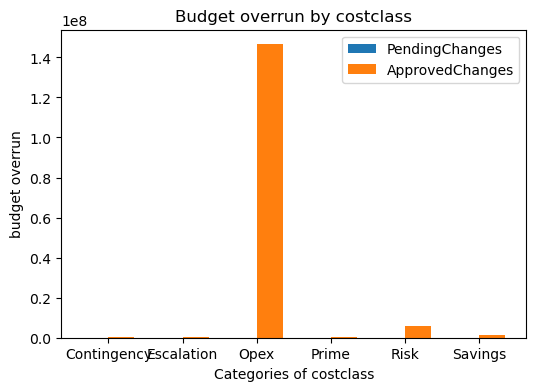

In [41]:
categorical_vis(costclass_df, 'costclass')

3. By TransactionType

In [42]:
contract_overrun.groupby('TransactionType')['PendingChanges','ApprovedChanges'].mean()

C:\Users\Avi\AppData\Local\Temp\ipykernel_21508\2683495105.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  contract_overrun.groupby('TransactionType')['PendingChanges','ApprovedChanges'].mean()


,PendingChanges,ApprovedChanges
TransactionType,,
CN,419791.470708,0.000000
CO,0.000000,457942.998234


- **Observations**

- There's approved changes by some transactiontype 
- By contractor type there are no pending or approved changes it seems (All contract names are missing)
- Only 'Prime' CostType has a pending changes others do not have any 

### Cost/Budget releated features

In [43]:
cost_df = costrac[['Actuals','ActualsinPreparation','OriginalBudget','PendingChanges','ApprovedChanges']]

In [44]:
cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65513 entries, 0 to 65512
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Actuals               65513 non-null  float64
 1   ActualsinPreparation  65513 non-null  float64
 2   OriginalBudget        65513 non-null  float64
 3   PendingChanges        65513 non-null  float64
 4   ApprovedChanges       65513 non-null  float64
dtypes: float64(5)
memory usage: 2.5 MB


In [45]:
cost_df.corr()

,Actuals,ActualsinPreparation,OriginalBudget,PendingChanges,ApprovedChanges
Actuals,1.000000e+00,3.148372e-04,-3.471533e-03,1.772270e-13,1.654824e-04
ActualsinPreparation,3.148372e-04,1.000000e+00,1.399484e-04,-7.144578e-15,-6.671116e-06
OriginalBudget,-3.471533e-03,1.399484e-04,1.000000e+00,7.877928e-14,7.355865e-05
PendingChanges,1.772270e-13,-7.144578e-15,7.877928e-14,1.000000e+00,-3.755281e-15
ApprovedChanges,1.654824e-04,-6.671116e-06,7.355865e-05,-3.755281e-15,1.000000e+00


In [46]:
cost_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Actuals,65513.0,5.023010e+04,5.683916e+05,-2.439257e+07,0.000000,0.0,0.000000,4.575658e+07
ActualsinPreparation,65513.0,-1.967034e+00,5.521396e+02,-1.410186e+05,0.000000,0.0,0.000000,6.160000e+03
OriginalBudget,65513.0,5.734905e+04,1.459916e+06,-1.329154e+05,0.000000,0.0,0.000000,1.854794e+08
PendingChanges,65513.0,-2.900182e-08,1.446167e+04,-9.711693e+05,0.000000,0.0,0.000000,1.397555e+06
ApprovedChanges,65513.0,-6.368008e+03,3.400750e+06,-2.376198e+08,-1290.982584,0.0,224.815578,5.031000e+08


In [47]:
cost_df[(cost_df['PendingChanges'] < 0.0) & (cost_df['Actuals'] != 0.0)]

,Actuals,ActualsinPreparation,OriginalBudget,PendingChanges,ApprovedChanges


In [48]:
cost_df[cost_df['OriginalBudget'] != 0.0]

,Actuals,ActualsinPreparation,OriginalBudget,PendingChanges,ApprovedChanges
0,0.0,0.0,4.400000e+05,0.0,0.0
1,0.0,0.0,4.400000e+05,0.0,0.0
2,0.0,0.0,6.600000e+05,0.0,0.0
3,0.0,0.0,6.600000e+05,0.0,0.0
4,0.0,0.0,1.100000e+06,0.0,0.0
...,...,...,...,...,...
5703,0.0,0.0,4.413233e+03,0.0,0.0
5704,0.0,0.0,6.296292e+04,0.0,0.0
5705,0.0,0.0,5.990926e+04,0.0,0.0
5706,0.0,0.0,1.664258e+07,0.0,0.0


In [49]:
cost_df[cost_df['Actuals'] != 0.0]

,Actuals,ActualsinPreparation,OriginalBudget,PendingChanges,ApprovedChanges
57180,56527.67,0.0,0.0,0.0,0.0
57181,20329.84,0.0,0.0,0.0,0.0
57182,80254.87,0.0,0.0,0.0,0.0
57183,21332.18,0.0,0.0,0.0,0.0
57184,848.34,0.0,0.0,0.0,0.0
...,...,...,...,...,...
65508,53418.60,0.0,0.0,0.0,0.0
65509,53418.60,0.0,0.0,0.0,0.0
65510,66695.22,0.0,0.0,0.0,0.0
65511,544895.35,0.0,0.0,0.0,0.0


In [50]:
cost_df[cost_df['PendingChanges'] > 0.0]

,Actuals,ActualsinPreparation,OriginalBudget,PendingChanges,ApprovedChanges
47592,0.0,0.0,0.0,7.000000e-03,0.0
47593,0.0,0.0,0.0,8.426680e+05,0.0
47594,0.0,0.0,0.0,1.279739e+06,0.0
47595,0.0,0.0,0.0,1.397555e+06,0.0
47596,0.0,0.0,0.0,1.203465e+06,0.0
47601,0.0,0.0,0.0,1.754514e+05,0.0
47602,0.0,0.0,0.0,2.664538e+05,0.0
47603,0.0,0.0,0.0,2.909842e+05,0.0
47604,0.0,0.0,0.0,2.505727e+05,0.0
47638,0.0,0.0,0.0,3.259415e+05,0.0


In [51]:
cost_df[(cost_df['PendingChanges'] > 0.0) & (cost_df['OriginalBudget'] > 0.0)]

,Actuals,ActualsinPreparation,OriginalBudget,PendingChanges,ApprovedChanges


In [52]:
# check if there are any rows where both actuals and original budget are zeros
cost_df[(cost_df['Actuals'] != 0.0) & (cost_df['PendingChanges'] != 0.0)]

,Actuals,ActualsinPreparation,OriginalBudget,PendingChanges,ApprovedChanges


In [53]:
cost_df[cost_df['ActualsinPreparation'] != 0.0]

,Actuals,ActualsinPreparation,OriginalBudget,PendingChanges,ApprovedChanges
57525,0.0,3201.47,0.0,0.0,0.0
57526,0.0,726.78,0.0,0.0,0.0
57644,0.0,-141018.65,0.0,0.0,0.0
57645,0.0,-5113.41,0.0,0.0,0.0
57649,0.0,86.41,0.0,0.0,0.0
57849,0.0,880.00,0.0,0.0,0.0
57850,0.0,880.00,0.0,0.0,0.0
57851,0.0,100.00,0.0,0.0,0.0
57852,0.0,100.00,0.0,0.0,0.0
57853,0.0,6160.00,0.0,0.0,0.0


In [54]:
cost_df[cost_df['ApprovedChanges'] < 0.0]

,Actuals,ActualsinPreparation,OriginalBudget,PendingChanges,ApprovedChanges
5708,0.0,0.0,0.0,0.0,-1.982265e+06
5731,0.0,0.0,0.0,0.0,-3.510000e+05
5769,0.0,0.0,0.0,0.0,-4.955660e+05
5789,0.0,0.0,0.0,0.0,-2.500000e+04
5829,0.0,0.0,0.0,0.0,-3.230550e+03
...,...,...,...,...,...
47727,0.0,0.0,0.0,0.0,-2.098068e+06
47728,0.0,0.0,0.0,0.0,-5.782925e+04
47729,0.0,0.0,0.0,0.0,-7.087001e+04
47735,0.0,0.0,0.0,0.0,-4.273579e+05


In [55]:
cost_df[(cost_df['ApprovedChanges'] != 0.0) | (cost_df['PendingChanges'] != 0.0)]

,Actuals,ActualsinPreparation,OriginalBudget,PendingChanges,ApprovedChanges
5708,0.0,0.0,0.0,0.0,-1.982265e+06
5709,0.0,0.0,0.0,0.0,1.022584e+05
5710,0.0,0.0,0.0,0.0,9.653401e+04
5711,0.0,0.0,0.0,0.0,4.892315e+04
5712,0.0,0.0,0.0,0.0,2.356978e+05
...,...,...,...,...,...
47740,0.0,0.0,0.0,0.0,8.292766e+05
47741,0.0,0.0,0.0,0.0,8.085966e+05
47742,0.0,0.0,0.0,0.0,7.816085e+05
47743,0.0,0.0,0.0,0.0,7.418569e+05


- All five types of charges do not overlap
- Approved changes and pendingchanges greater than zero could be the ones who are runnning over the budgeted cost
- Rows with only original budget can be of those belong no change in budget
- Actual and actuals in prep could be on line with budget allocation


**Analyze all 8 features with cost variables**

- Dataset around 16k+ pending or approved charges which can be the case of costoverruns and others are non cost overruns
- Out of 8 features analyzed some categories of features are not present in costoverrun sub-dataset.

## Important features analysis 

In [56]:
final_df = costrac[['CostType', 'ElementCode','DisciplineCode','PackageCode', 'Item','Contractor','CostClass','TransactionType','Actuals','Actuals','ActualsinPreparation','OriginalBudget','PendingChanges','ApprovedChanges']]

In [57]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65513 entries, 0 to 65512
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CostType              65513 non-null  object 
 1   ElementCode           65513 non-null  object 
 2   DisciplineCode        65513 non-null  object 
 3   PackageCode           65513 non-null  object 
 4   Item                  65513 non-null  object 
 5   Contractor            15821 non-null  object 
 6   CostClass             65513 non-null  object 
 7   TransactionType       65513 non-null  object 
 8   Actuals               65513 non-null  float64
 9   Actuals               65513 non-null  float64
 10  ActualsinPreparation  65513 non-null  float64
 11  OriginalBudget        65513 non-null  float64
 12  PendingChanges        65513 non-null  float64
 13  ApprovedChanges       65513 non-null  float64
dtypes: float64(6), object(8)
memory usage: 7.0+ MB


In [58]:
def categorical_cost_change(pending, approv):
    if (pending > 0.0 or approv > 0.0):
        return 'positive_change'
    elif (pending < 0.0 and approv < 0.0):
        return 'negative_change'
    elif (pending < 0.0 and approv == 0.0):
        return 'negative_change'
    elif (pending == 0.0 and approv < 0.0):
        return 'negative_change'
    else:
        return 'no_change'

In [59]:
final_df['Cost_change'] = final_df.apply(lambda row: categorical_cost_change(row['PendingChanges'], row['ApprovedChanges']), axis=1)

C:\Users\Avi\AppData\Local\Temp\ipykernel_21508\131791970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Cost_change'] = final_df.apply(lambda row: categorical_cost_change(row['PendingChanges'], row['ApprovedChanges']), axis=1)


In [60]:
final_df['Cost_change'].value_counts()

no_change          31425
negative_change    17255
positive_change    16833
Name: Cost_change, dtype: int64

In [61]:
final_df['cost_overrun_value'] = final_df['PendingChanges'] + final_df['ApprovedChanges']

C:\Users\Avi\AppData\Local\Temp\ipykernel_21508\2789086299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['cost_overrun_value'] = final_df['PendingChanges'] + final_df['ApprovedChanges']


In [62]:
# percentage of items where budget has changed than original
len(final_df[final_df['cost_overrun_value'] != 0.0 ])/len(final_df)

0.5203242104620457

In [63]:
# percentage of items where there is positive change in budget
len(final_df[final_df['cost_overrun_value'] > 0.0 ])/len(final_df)

0.2569413704150321

In [64]:
len(final_df[final_df['ApprovedChanges'] > 0.0 ])/len(final_df)

0.25657503090989575

### Data visualization of final_df with cost changes feature

In [89]:
# data vis by each column to see what affects cost overrun
def column_vis(df, column):
    cat_df = df.groupby(column)['PendingChanges','ApprovedChanges'].mean()
    categories = cat_df.index
    feature1 = cat_df['PendingChanges']
    feature2 = cat_df['ApprovedChanges']
    
    plt.figure(figsize=(8,5))
    ax = plt.gca()
    # Width of each bar group
    bar_width = 0.35

    # Positions for the bars
    bar_positions1 = np.arange(len(categories))
    bar_positions2 = bar_positions1 + bar_width

    # Plot the grouped bars
    rects1 = ax.bar(bar_positions1, feature1, width=bar_width, label='PendingChanges')
    rects2 = ax.bar(bar_positions2, feature2, width=bar_width, label='ApprovedChanges')

    # Set x-axis labels and title
    ax.set_xticks(bar_positions1 + bar_width / 2)
    ax.set_xticklabels(categories, rotation=80)
    ax.set_xlabel(f'Categories of {column}')
    ax.set_ylabel('budget overrun or not')
    ax.set_title(f'Budget overrun by {column}')

    # Show the legend
    ax.legend()

    # Show the plot
    plt.show()

C:\Users\Avi\AppData\Local\Temp\ipykernel_21508\671399526.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cat_df = df.groupby(column)['PendingChanges','ApprovedChanges'].mean()


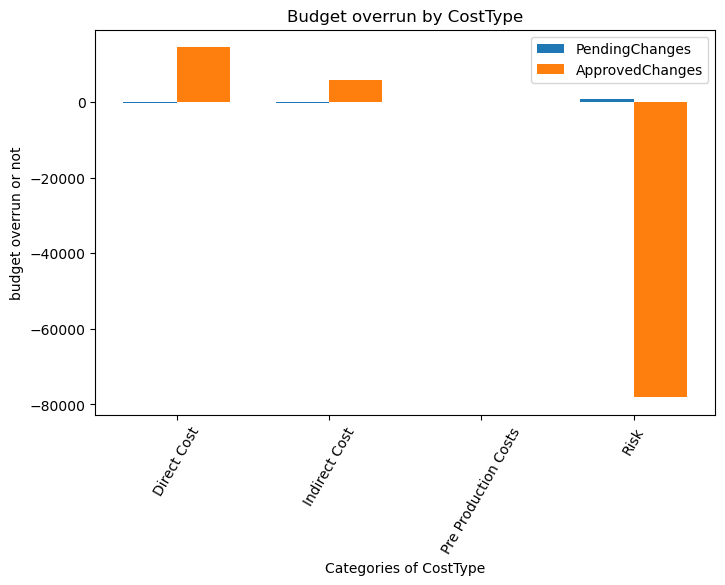

In [87]:
column_vis(final_df, 'CostType')

C:\Users\Avi\AppData\Local\Temp\ipykernel_21508\2201762295.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cat_df = df.groupby(column)['PendingChanges','ApprovedChanges'].mean()


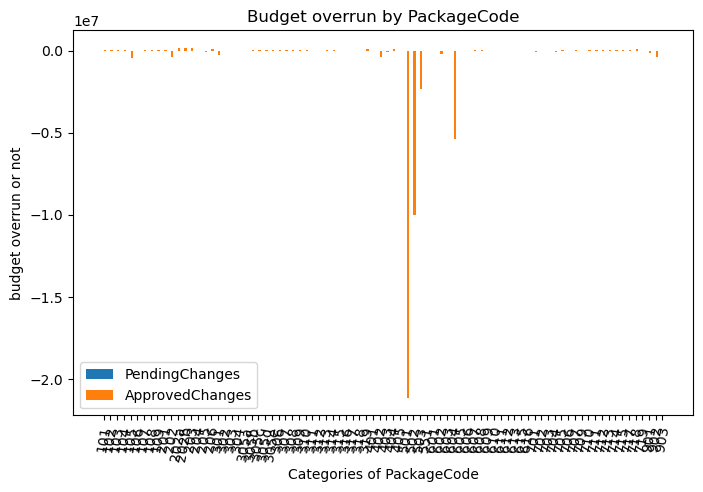

In [90]:
column_vis(final_df, 'PackageCode')

C:\Users\Avi\AppData\Local\Temp\ipykernel_21508\2201762295.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cat_df = df.groupby(column)['PendingChanges','ApprovedChanges'].mean()


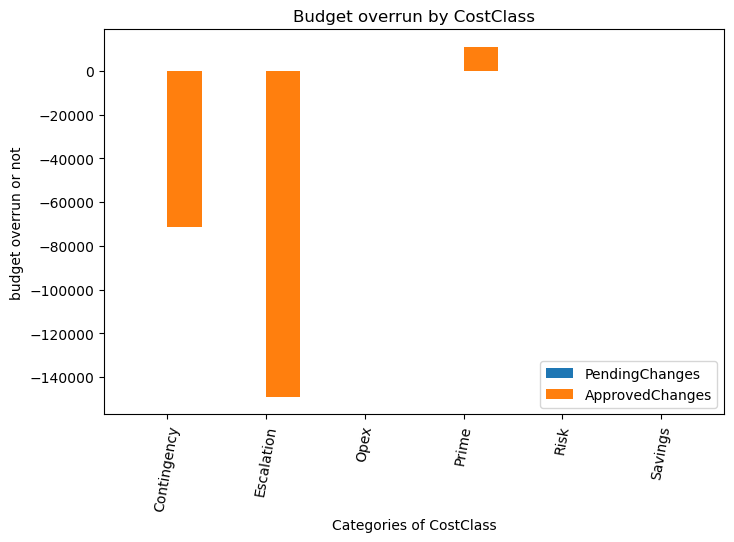

In [91]:
column_vis(final_df, 'CostClass')

C:\Users\Avi\AppData\Local\Temp\ipykernel_21508\1099894369.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cat_df = df.groupby(column)['PendingChanges','ApprovedChanges'].mean()


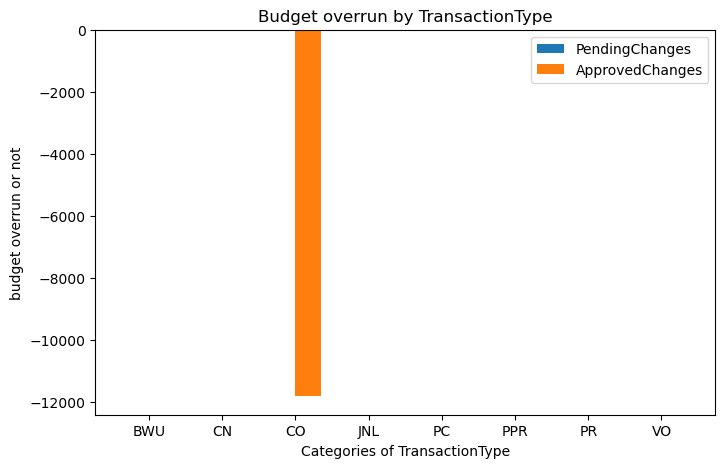

In [69]:
column_vis(final_df, 'TransactionType')

C:\Users\Avi\AppData\Local\Temp\ipykernel_21508\2201762295.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cat_df = df.groupby(column)['PendingChanges','ApprovedChanges'].mean()


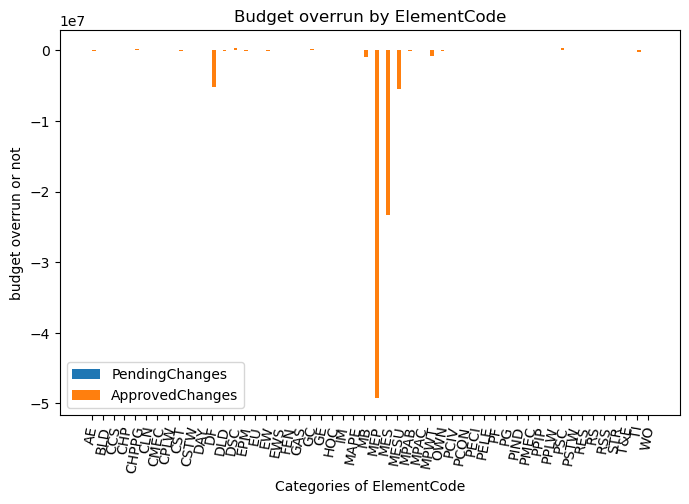

In [92]:
column_vis(final_df, 'ElementCode')

C:\Users\Avi\AppData\Local\Temp\ipykernel_21508\1099894369.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cat_df = df.groupby(column)['PendingChanges','ApprovedChanges'].mean()


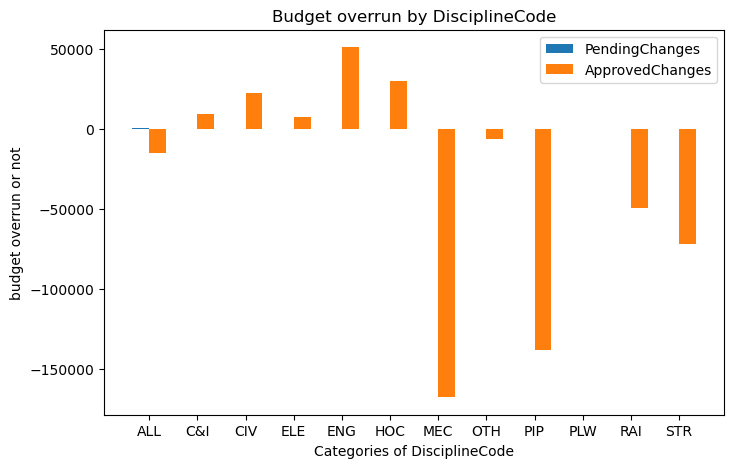

In [76]:
column_vis(final_df, 'DisciplineCode')

**Observations:**

- We can see the how budget is changing according to different features like CostType, DisciplineCode, etc.

In [79]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65513 entries, 0 to 65512
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CostType              65513 non-null  object 
 1   ElementCode           65513 non-null  object 
 2   DisciplineCode        65513 non-null  object 
 3   PackageCode           65513 non-null  object 
 4   Item                  65513 non-null  object 
 5   Contractor            15821 non-null  object 
 6   CostClass             65513 non-null  object 
 7   TransactionType       65513 non-null  object 
 8   Actuals               65513 non-null  float64
 9   Actuals               65513 non-null  float64
 10  ActualsinPreparation  65513 non-null  float64
 11  OriginalBudget        65513 non-null  float64
 12  PendingChanges        65513 non-null  float64
 13  ApprovedChanges       65513 non-null  float64
 14  Cost_change           65513 non-null  object 
 15  cost_overrun_value 

C:\Users\Avi\AppData\Local\Temp\ipykernel_21508\755372015.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(final_df.corr())


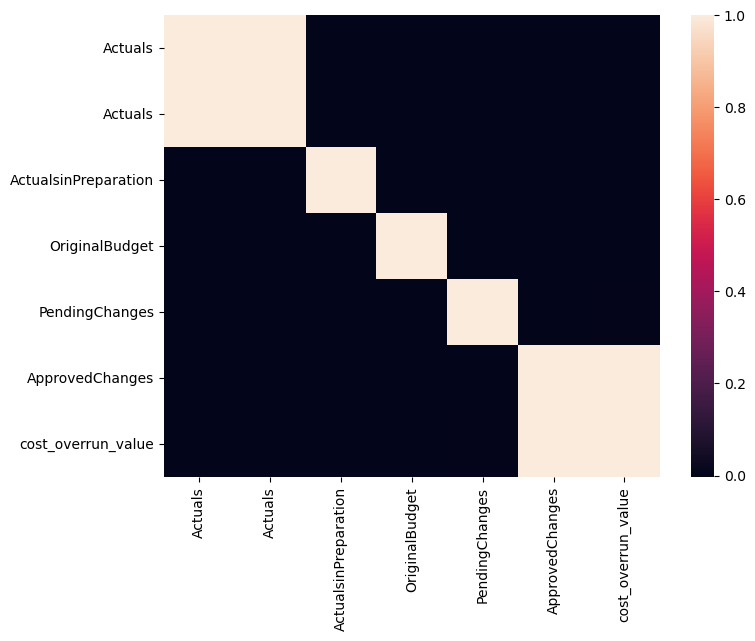

In [84]:
plt.figure(figsize=(8,6))
sns.heatmap(final_df.corr())
plt.show()

- There is positive correlation between approved changes and cost_overrun_value